In [ ]:
from ref2 import Factory

In [2]:
import random
seed = random.randint(1, 10000)
seed = 200
factory = Factory("test_1.txt", seed=seed)
print(seed)

200


In [3]:
from deap import base, tools, creator, algorithms
import random
import matplotlib.pyplot as plt
import numpy as np

In [4]:

def mutExplore(individual: list[int], indpb: float) -> tuple[list[int]]:
	mut_func = [factory.mutateSwapDayOrder, factory.mutateExchangeDeliverDay]
	rand_func = random.choice(mut_func)
	return rand_func(individual, indpb)

def fitness(individual: list[int]) -> tuple[int]:
	buffer = factory.evaluateTruckSchedule(individual)
	return (buffer.total_cost, )

def sel_elite_tourn(individuals, size, tournsize):
	k_elite = int(size * 0.1)
	k = size - k_elite
	return tools.selBest(individuals, k_elite) + tools.selTournament(individuals, k, tournsize)

def average_without_outliers(data: np) -> float:
	Q1 = np.percentile(data, 25)
	Q3 = np.percentile(data, 75)
	IQR = Q3 - Q1

	# Define the outlier bounds
	lower_bound = Q1 - 1.5 * IQR
	upper_bound = Q3 + 1.5 * IQR

	# Filter out the outliers
	# print(data)
	filtered_data = [
		ele[0] for ele in data if ele[0] >= lower_bound and ele[0] <= upper_bound
	]

	# Calculate the mean of the filtered data
	return np.mean(filtered_data)

In [5]:
## set up the toolbox
toolbox = base.Toolbox()

creator.create("fitnessMin", base.Fitness, weights=(-1.0,)) # fitness (a class for evaluation)

creator.create("individual", list, fitness=creator.fitnessMin) # a class to represent an individual

toolbox.register("individualInit", tools.initIterate, creator.individual, factory.truckScheduleInit)

toolbox.register("populationInit", tools.initRepeat, list, toolbox.individualInit)

factory.resigterIndividualClass(creator.individual)

In [6]:
size = 200
elite = int(size * 0.1)
k = size - elite
toolbox.register("select", sel_elite_tourn, tournsize=2)
toolbox.register("evaluate", fitness)
toolbox.register("mate", factory.crossoverTruck)
toolbox.register("mutate", mutExplore, indpb=0.1)

In [7]:
## build and run the GA
size = 200
starting_pop = toolbox.populationInit(size)
buffer = factory.evaluateTruckSchedule(starting_pop[0])
stats = tools.Statistics(lambda ind:ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", average_without_outliers)
hof = tools.HallOfFame(5)
eval = factory.evaluateTruckSchedule(starting_pop[0])
print(eval)
# print(type(starting_pop[0]))
# print(type(starting_pop[0].individual))


TruckEvalSheet
total_truck_dist=151212.3402921411
total_truck=85
max_truck=9
truck_violation=0
penalty=0
total_cost=15121251529


gen	nevals	min        	avg        
0  	200   	1.40865e+10	1.47997e+10
1  	193   	1.37011e+10	1.46165e+10
2  	194   	1.38388e+10	1.44964e+10
3  	197   	1.37519e+10	1.43631e+10
4  	192   	1.34429e+10	1.42233e+10
5  	196   	1.34429e+10	1.40855e+10
6  	195   	1.33652e+10	1.39585e+10
7  	193   	1.34267e+10	1.38504e+10
8  	195   	1.3378e+10 	1.37544e+10
9  	196   	1.33346e+10	1.36741e+10
10 	193   	1.32571e+10	1.35969e+10
11 	194   	1.32571e+10	1.35229e+10
12 	197   	1.31743e+10	1.34551e+10
13 	196   	1.30608e+10	1.33859e+10
14 	191   	1.30289e+10	1.33316e+10
15 	193   	1.29954e+10	1.33012e+10
16 	193   	1.28744e+10	1.32446e+10
17 	192   	1.28068e+10	1.31844e+10
18 	195   	1.27154e+10	1.31258e+10
19 	195   	1.27154e+10	1.30587e+10
20 	191   	1.26329e+10	1.29969e+10
21 	192   	1.26326e+10	1.29392e+10
22 	191   	1.26269e+10	1.28652e+10
23 	194   	1.26269e+10	1.28205e+10
24 	193   	1.25494e+10	1.27766e+10
25 	196   	1.25293e+10	1.27311e+10
26 	195   	1.24566e+10	1.26942e+10
27 	197   	1.24566e+

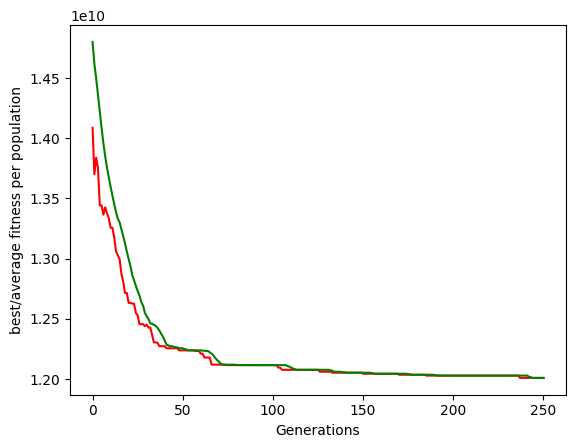

In [8]:
p_cx = 0.9
p_mut = 0.7
iteration = 250

final_pop, logbook = algorithms.eaSimple(
    starting_pop,
    toolbox,
    p_cx,
    p_mut,
    iteration,
    stats,
    hof,
    True
)

#print(f"best solution: {hof[0]}")

plt.plot(logbook.select("min"), color='red')
plt.plot(logbook.select("avg"), color='green')
plt.xlabel('Generations')
plt.ylabel('best/average fitness per population')
plt.show()

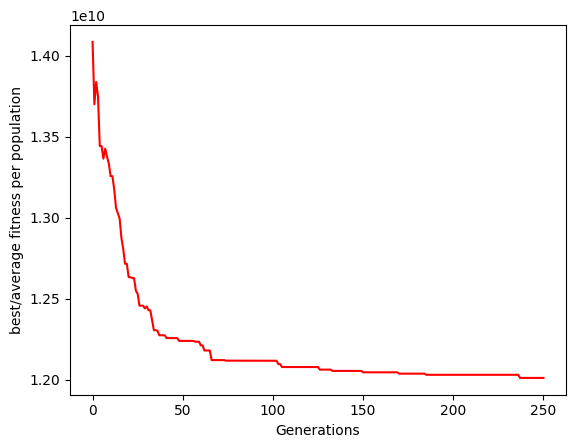

In [9]:
plt.plot(logbook.select("min"), color='red')
# plt.plot(logbook.select("avg"), color='green')
plt.xlabel('Generations')
plt.ylabel('best/average fitness per population')
plt.show()

In [10]:

res = factory.evaluateTruckSchedule(hof[0])
print(res)
print(res.cal_cost(factory))
print(hof[0]) #12297372635

TruckEvalSheet
total_truck_dist=120100.33863260006
total_truck=67
max_truck=8
truck_violation=0
penalty=0
total_cost=12010048563
12010048563
[3, 5, 6, 0, 8, 1, 9, 7, 2, 11, 0, 14, 13, 10, 4, 12, 0, 28, 18, 24, 22, 27, 17, 21, 19, 23, 20, 15, 0, 25, 26, 16, 0, 29, 37, 33, 32, 31, 35, 0, 46, 36, 43, 47, 44, 41, 39, 34, 0, 50, 54, 40, 42, 45, 38, 30, 49, 53, 0, 48, 55, 56, 57, 51, 52, 0, 62, 60, 58, 59, 61, 0, 0, 67, 65, 63, 64, 0, 72, 70, 66, 71, 69, 0, 74, 73, 76, 75, 68, 0, 77, 80, 79, 78, 0, 85, 82, 83, 84, 81, 0, 87, 86, 0, 88, 90, 92, 91, 89, 0, 0, 96, 102, 103, 97, 105, 101, 0, 110, 95, 113, 112, 109, 94, 115, 107, 108, 106, 100, 93, 104, 98, 99, 116, 114, 0, 111, 117, 0, 118, 120, 0, 124, 122, 0, 126, 123, 119, 129, 125, 121, 0, 127, 132, 133, 130, 128, 131, 0, 134, 135, 0, 140, 141, 142, 138, 136, 0, 139, 148, 137, 150, 143, 0, 145, 144, 149, 146, 147, 0, 0, 0, 0, 0]


In [11]:
def mutExplore(individual: list[int], indpb: float) -> tuple[list[int]]:
	mut_func = [factory.mutateTechScramble, factory.mutateTechSwap, factory.mutateTechShift]
	rand_func = random.choice(mut_func)
	return rand_func(individual, indpb)
	# return factory.mutateTechSwap(individual, indpb)

def fitness(individual: list[int]) -> tuple[int]:
	buffer = factory.evaluateSchedule(individual)
	return (buffer.cal_cost(factory), )

In [12]:
factory.resigterTruckScheduleRef(hof[0])
toolbox.register("individualInit", tools.initIterate, creator.individual, factory.scheduleInit)
toolbox.register("populationInit", tools.initRepeat, list, toolbox.individualInit)
toolbox.register("evaluate", fitness)
toolbox.register("mate", factory.crossoverTech)
toolbox.register("mutate", mutExplore, indpb=0.1)

In [13]:
## build and run the GA
size = 100
starting_pop = toolbox.populationInit(size)
hof2 = tools.HallOfFame(5)
score = factory.evaluateSchedule(starting_pop[0])
print(score)
print(score.cal_cost(factory))

EvalSheet(truck=TruckEvalSheet
total_truck_dist=120100.33863260006
total_truck=74
max_truck=8
truck_violation=0
penalty=0
total_cost=12010049263, tech=TechEvalSheet
tech_violation=0
tech_penalty=0
total_tech_dist=10178.657674322669
no_tech_employed=46
total_tech_deployed=137
idle_machine_cost=0
total_tech_penalty=0
total_cost=115532576)
12125581839


In [14]:
print(score.tech.total_cost)
print(119801465 - 119361758)

115532576
439707


gen	nevals	min        	avg        
0  	100   	1.21256e+10	1.21256e+10
1  	98    	1.21256e+10	1.21256e+10
2  	98    	1.21256e+10	1.21256e+10
3  	98    	1.21256e+10	1.21256e+10
4  	98    	1.21256e+10	1.21256e+10
5  	98    	1.21256e+10	1.21256e+10
6  	95    	1.21256e+10	1.21256e+10
7  	99    	1.21256e+10	1.21256e+10
8  	97    	1.21256e+10	1.21256e+10
9  	100   	1.21256e+10	1.21256e+10
10 	99    	1.21256e+10	1.21256e+10
11 	100   	1.21256e+10	1.21256e+10
12 	97    	1.21256e+10	1.21256e+10
13 	97    	1.21256e+10	1.21256e+10
14 	100   	1.21256e+10	1.21256e+10
15 	97    	1.21256e+10	1.21256e+10
16 	96    	1.21256e+10	1.21256e+10
17 	97    	1.21256e+10	1.21256e+10
18 	100   	1.21232e+10	1.21256e+10
19 	99    	1.21232e+10	1.21256e+10
20 	99    	1.21232e+10	1.21256e+10
21 	98    	1.21232e+10	1.21256e+10
22 	99    	1.21232e+10	1.21249e+10
23 	100   	1.21232e+10	1.21245e+10
24 	98    	1.21232e+10	1.21239e+10
25 	100   	1.21232e+10	1.21232e+10
26 	98    	1.21232e+10	1.21232e+10
27 	99    	1.21232e+

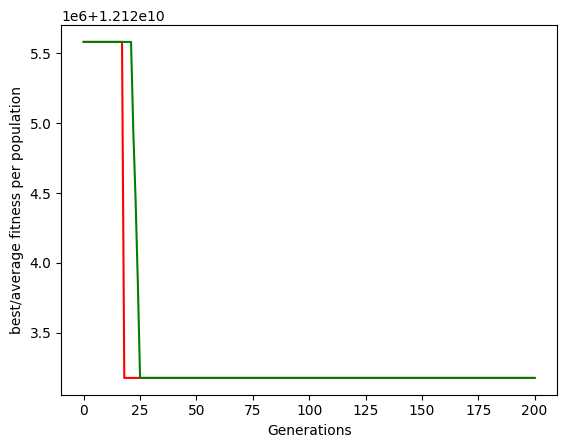

In [15]:
p_cx = 0.9
p_mut = 0.8
iteration = 200

final_pop, logbook = algorithms.eaSimple(
    starting_pop,
    toolbox,
    p_cx,
    p_mut,
    iteration,
    stats,
    hof2,
    True
)

#print(f"best solution: {hof[0]}")

plt.plot(logbook.select("min"), color='red')
plt.plot(logbook.select("avg"), color='green')
plt.xlabel('Generations')
plt.ylabel('best/average fitness per population')
plt.show()

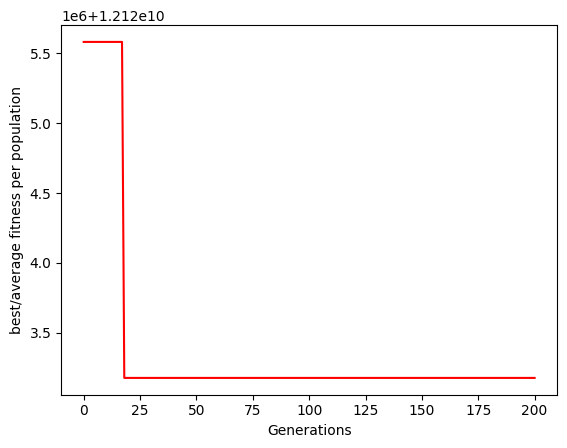

In [16]:
plt.plot(logbook.select("min"), color='red')
plt.xlabel('Generations')
plt.ylabel('best/average fitness per population')
plt.show()

In [17]:
eval = factory.evaluateSchedule(hof2[0])
print(eval)
print(eval.cal_cost(factory))
#12743912302
# seed = 200, cost = 12593854581
# seed = 7799, cost = NA (random start), cost = 12499379711(set start)
# best_individual = tools.selBest(final_pop, 1)[0]
# score = factory.evaluateSchedule(starting_pop[0])
# print(score)
# print(score.cal_cost(factory))

EvalSheet(truck=TruckEvalSheet
total_truck_dist=120100.33863260006
total_truck=74
max_truck=8
truck_violation=0
penalty=0
total_cost=12010049263, tech=TechEvalSheet
tech_violation=0
tech_penalty=0
total_tech_dist=9948.101824255922
no_tech_employed=46
total_tech_deployed=136
idle_machine_cost=388
total_tech_penalty=0
total_cost=113127406)
12123176669


In [18]:
scedule = factory.Schedule([], [])
for day in hof2[0]:
	scedule.add(day)
with open('debug3.txt', 'w') as f:
	f.write(str(factory.evaluateSchedule(scedule)))
	f.write(str(scedule))